In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import f_oneway, kruskal
from math import sqrt

import wrangle
import explore

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'

# Plot #1:

**In mvp-sa section Hypothesis testing, 1st plot, would like this side by side SA and Dallas
explore.sns_boxplot(train_exp)**


Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(289, 40) (73, 40)
Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(246, 40) (62, 40)


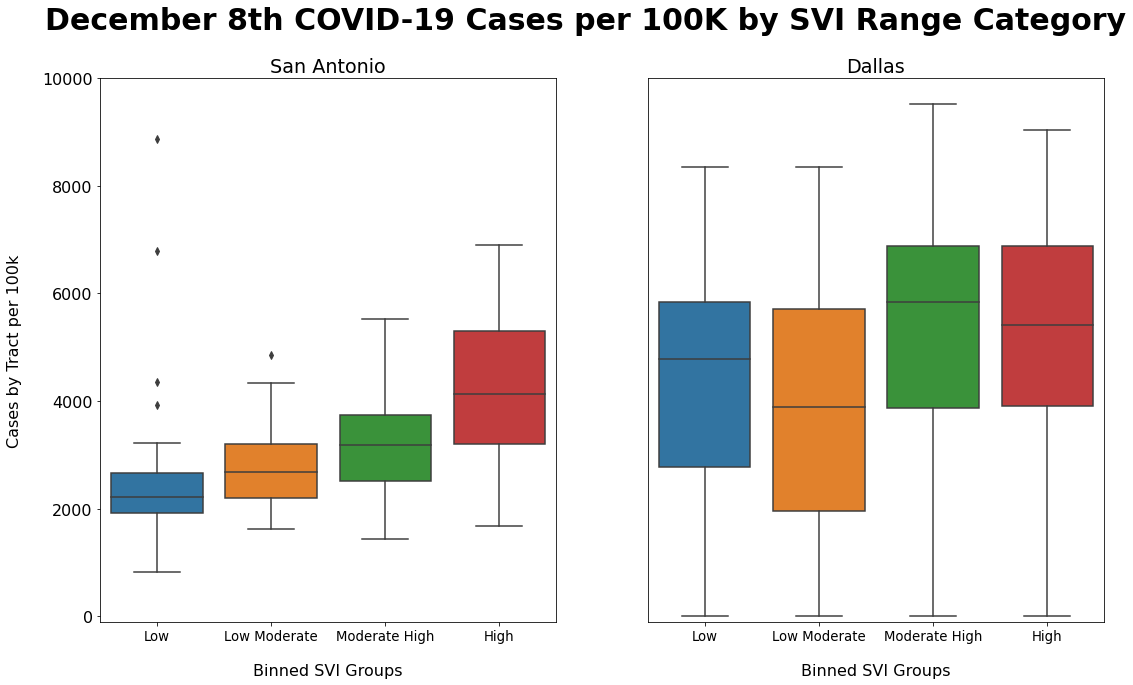

In [83]:

fig, axes = plt.subplots(1,2, figsize=(18, 10))
plt.suptitle('December 8th COVID-19 Cases per 100K by SVI Range Category', fontsize=30, fontweight = 'bold')
axes[0].set_title('San Antonio')
axes[1].set_title('Dallas')

# San Antonio Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_data()
ax1 = sns.boxplot(ax=axes[0], 
            data=train_exp, 
            x='bin_svi', 
            y='tract_cases_per_100k')
ax1.set_ylim([-100, 10000])
ax1.set_ylabel("Cases by Tract per 100k",labelpad=20)
ax1.set_xlabel("Binned SVI Groups",labelpad=20)
ax1.tick_params(axis ='x', labelsize ='small')


#Dallas Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_dallas_data()
ax2 = sns.boxplot(ax=axes[1], 
            data=train_exp, 
            x='bin_svi', 
            y='tract_cases_per_100k')
ax2.set_ylim([-100, 10000])
ax2.yaxis.set_visible(False)
ax2.tick_params(axis ='x', labelsize ='small')
ax2.set_xlabel("Binned SVI Groups",labelpad=20)

plt.show()